In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
from poitousprint import Portic
portic_client = Portic()

In [2]:
#pointcalls = portic_client.get_pointcalls(year=1789, source_subset="Poitou_1789")

In [3]:
#len(pointcalls)

In [50]:
sorties = pd.read_csv("sorties_navires_vers_etranger.csv")

In [51]:
len(sorties)

367

In [56]:
sorties["homeport_state_1789_fr"] = sorties.homeport_state_1789_fr.str.replace("Duché de Mecklenbourg", "Mecklenbourg")

In [57]:
len(sorties[sorties.homeport_state_1789_fr.isna()])

28

In [58]:
sorties[sorties.homeport_state_1789_fr.isna()].sample(5)

,port_depart,outdate_fixed,port_destination,substate_destination,state_destination,homeport_state_1789_fr,homeport_toponyme_fr,homeport_province,commodity_standardized_fr,commodity_standardized2_fr,commodity_standardized3_fr,commodity_standardized4_fr,taxe_amount01,taxe_amount02,taxe_amount03,tonnage,tonnage_unit,tonnage_class,ship_flag_standardized_fr
89,Marennes,1789-06-20,Amsterdam,Hollande,Provinces-Unies,NaN,NaN,NaN,Sel,NaN,NaN,NaN,480,0,0,176.0,tx,[101-200],NaN
204,Ars-en-Ré,1789-02-22,Penzance,Angleterre,Grande-Bretagne,NaN,NaN,NaN,Sel,NaN,NaN,NaN,480,0,0,150.0,tx,[101-200],britannique
129,La Rochelle,1789-04-09,Mer Baltique,NaN,zone maritime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 800,0,0,200.0,tx,[101-200],danois
86,Noirmoutier,1789-07-08,Königsberg / Kaliningrad,NaN,Prusse,NaN,NaN,NaN,Sel,NaN,NaN,NaN,480,0,0,130.0,tx,[101-200],NaN
63,Ars-en-Ré,1789-02-13,Poole,Angleterre,Grande-Bretagne,NaN,NaN,NaN,Sel,NaN,NaN,NaN,480,0,0,160.0,tx,[101-200],britannique


In [59]:
flag_to_homestate = {"britannique": "Grande-Bretagne",
                    "français": "France",
                     "danois": "Danemark",
                     "hollandais": "Provinces-Unies",
                     "étasunien": "Etats-Unis d'Amérique",
                     "prussien": "Prusse",
                     "lubeckois": "Lubeck",
                     "polonais": "Pologne",
                     "hambourgeois": "Hambourg",
                     "brémois": "Brême",
                     "meckelmbourgeois": "Mecklenbourg",
                     "oldenbourgeois": "Duché d'Oldenbourg",
                     "papenbourgeois": "Prusse"
                    }

In [60]:
sorties[sorties.homeport_state_1789_fr.isna()][["homeport_state_1789_fr", "ship_flag_standardized_fr"]].sample(5)

,homeport_state_1789_fr,ship_flag_standardized_fr
87,NaN,NaN
4,NaN,étasunien
117,NaN,hollandais
180,NaN,britannique
88,NaN,NaN


In [61]:
sorties["flag"] = sorties.ship_flag_standardized_fr.map(flag_to_homestate)

In [63]:
sorties[["homeport_state_1789_fr", "ship_flag_standardized_fr", "flag"]].sample(5)

,homeport_state_1789_fr,ship_flag_standardized_fr,flag
344,France,français,France
209,Danemark,danois,Danemark
38,France,français,France
47,France,français,France
37,Provinces-Unies,hollandais,Provinces-Unies


In [64]:
sorties["homeport_state_1789_fr"] = sorties["homeport_state_1789_fr"].fillna(sorties.flag)
sorties["homeport_state_1789_fr"] = sorties["homeport_state_1789_fr"].fillna("Non renseigné")

In [65]:
sorties.homeport_state_1789_fr.value_counts()

Grande-Bretagne          123
Danemark                  54
France                    54
Provinces-Unies           44
Etats-Unis d'Amérique     25
Prusse                    23
Lubeck                     8
Non renseigné              8
Pologne                    7
Hambourg                   7
Brême                      5
Mecklenbourg               4
Espagne                    3
Duché d'Oldenbourg         2
Name: homeport_state_1789_fr, dtype: int64

In [66]:
sorties.state_destination.value_counts()

Grande-Bretagne          111
Danemark                  52
Provinces-Unies           41
zone maritime             29
Etats-Unis d'Amérique     26
Prusse                    20
Autriche                  16
Espagne                   14
France                    11
multi-Etat                11
Lubeck                     9
Hambourg                   7
Portugal                   6
Brême                      6
Pologne                    5
Russie                     2
Mecklenbourg               1
Name: state_destination, dtype: int64

In [19]:
sorties.homeport_state_1789_fr.value_counts()

Grande-Bretagne          123
Danemark                  54
France                    54
Provinces-Unies           44
Etats-Unis d'Amérique     25
Prusse                    23
Lubeck                     8
Non renseigné              8
Pologne                    7
Hambourg                   7
Brême                      5
Mecklenbourg               3
Espagne                    3
Duché d'Oldenbourg         2
Duché de Mecklenbourg      1
Name: homeport_state_1789_fr, dtype: int64

In [20]:
sorties.homeport_province.value_counts()

Aunis        31
Bretagne      9
Normandie     6
Guyenne       3
Saintonge     3
Poitou        1
Picardie      1
Name: homeport_province, dtype: int64

In [67]:
sorties["outside_DFLR"] = (
    (sorties["homeport_state_1789_fr"] != "France") | 
    (~sorties["homeport_province"].isin(["Aunis", "Poitou", "Saintonge"])))

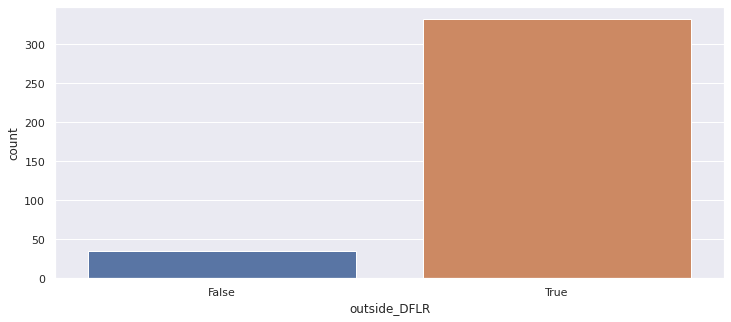

In [68]:
ax = sns.countplot(x="outside_DFLR", data=sorties)

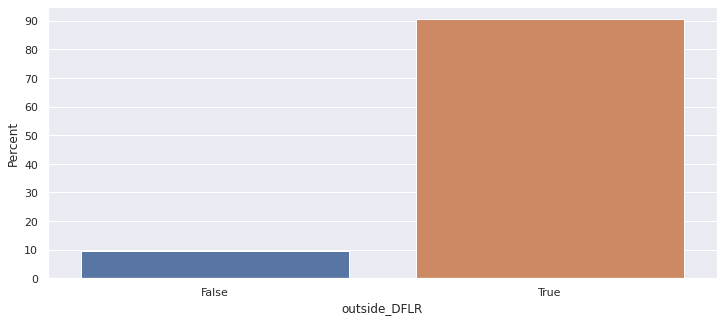

In [69]:
ax = sns.barplot(x="outside_DFLR", y="outside_DFLR", data=sorties, estimator=lambda x: len(x) / len(sorties) * 100)
ax.set(ylabel="Percent")
plt.yticks(np.arange(0, 100, 10))
plt.show()

In [102]:
sorties["commodity_standardized_fr"] = sorties["commodity_standardized_fr"].fillna("")

In [103]:
sorties["vers_colonies"] = sorties[sorties.commodity_standardized_fr.str.startswith("Pêche")]

In [109]:
sorties["vers_colonies"] = (
    sorties.substate_destination.str.startswith("colonie") & 
    (~sorties.commodity_standardized_fr.str.startswith("Pêche")) &
    (~sorties.port_destination.str.startswith("Saint-Pierre-et-Miquelon")) &
    (~sorties.port_destination.str.startswith("Terre-Neuve"))

)

In [113]:
sorties[sorties.vers_colonies == True][["port_depart", "outdate_fixed", "port_destination", "homeport_province", "substate_destination", "commodity_standardized_fr", "tonnage", "tonnage_unit", "tonnage_class"]]

,port_depart,outdate_fixed,port_destination,homeport_province,substate_destination,commodity_standardized_fr,tonnage,tonnage_unit,tonnage_class
34,La Rochelle,1789-08-06,Cap-Français,Aunis,colonies françaises d'Amérique,,250.0,tx,[201-500]
61,Ars-en-Ré,1789-08-06,colonies anglaises [en Amérique],Guyenne,colonies britanniques d'Amérique,,210.0,tx,[201-500]
115,Ars-en-Ré,1789-04-21,Colonies françaises en Amérique,Bretagne,colonies françaises d'Amérique,Sel,70.0,tx,[51-100]
162,Rochefort,1789-01-01,Côte d'Angole,Aunis,colonies portugaises d'Afrique,Marchandises permises,614.0,tx,[501 et plus]
168,Rochefort,1789-03-07,Cap-Français,Aunis,colonies françaises d'Amérique,Poudre à canon,160.0,tx,[101-200]
344,La Rochelle,1789-02-13,Martinique,Aunis,colonies françaises d'Amérique,,400.0,tx,[201-500]
347,La Rochelle,1789-05-09,île Bourbon / île de la Réunion,Aunis,colonies françaises en Asie,,500.0,tx,[201-500]
352,La Rochelle,1789-12-02,Gonaïves,Aunis,colonies françaises d'Amérique,,240.0,tx,[201-500]
363,La Rochelle,1789-04-06,Côte d'Angole,Aunis,colonies portugaises d'Afrique,,584.0,tx,[501 et plus]


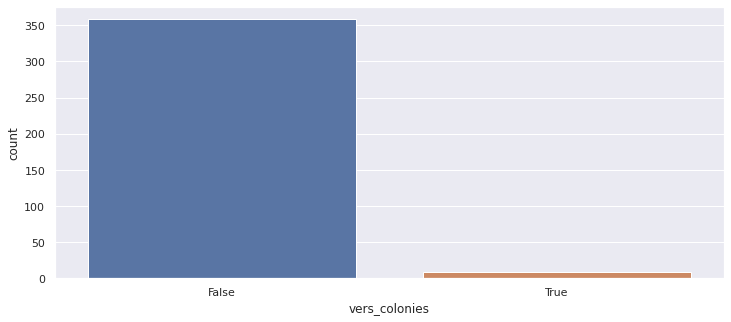

In [111]:
ax = sns.countplot(x="vers_colonies", data=sorties)

In [70]:
noDFLR = sorties[(sorties.outside_DFLR == True)]

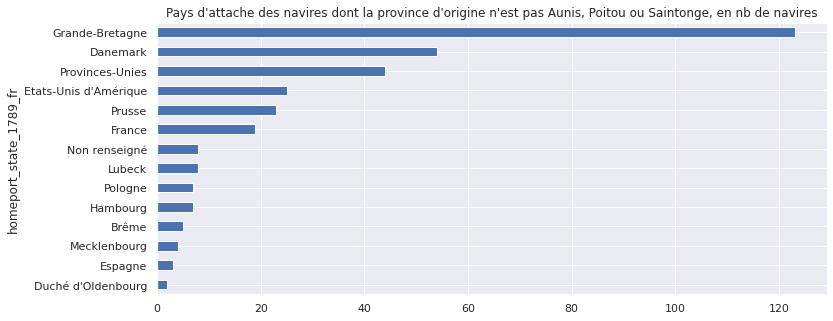

In [71]:
nb_pointcalls = noDFLR.groupby("homeport_state_1789_fr").size()
nb_pointcalls.sort_values().plot.barh()
plt.title(
    "Pays d'attache des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en nb de navires")
plt.show()

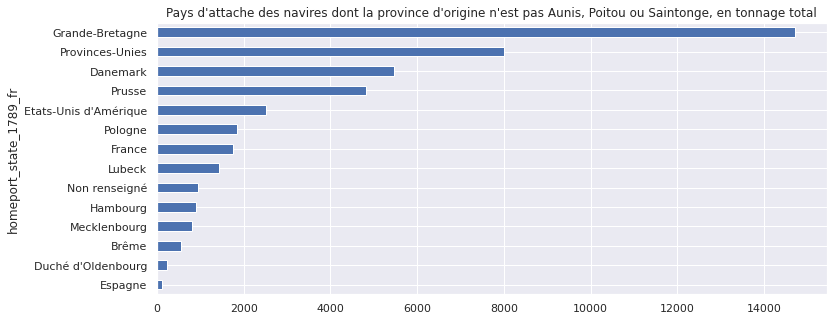

In [74]:
tonnage = noDFLR.groupby("homeport_state_1789_fr")["tonnage"].sum()
tonnage.sort_values().plot.barh()
plt.title(
    "Pays d'attache des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en tonnage total")
plt.show()

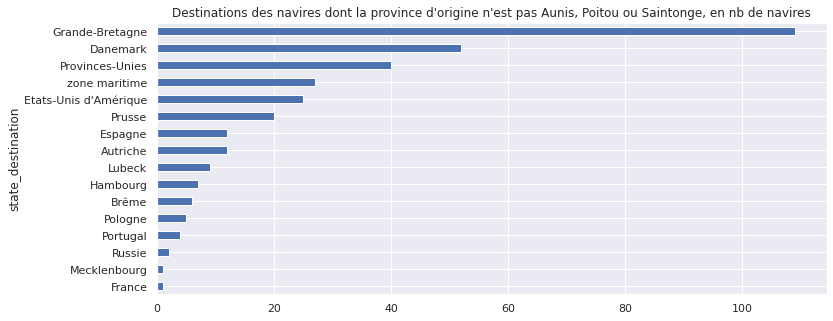

In [76]:
destination = noDFLR.groupby("state_destination").size()
destination.sort_values().plot.barh()
plt.title(
    "Destinations des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en nb de navires")
plt.show()

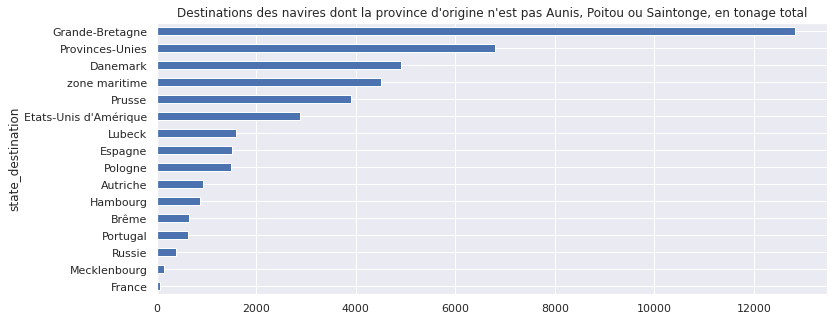

In [78]:
noDFLR.groupby("state_destination")["tonnage"].sum().sort_values().plot.barh()
plt.title(
    "Destinations des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en tonage total")
plt.show()

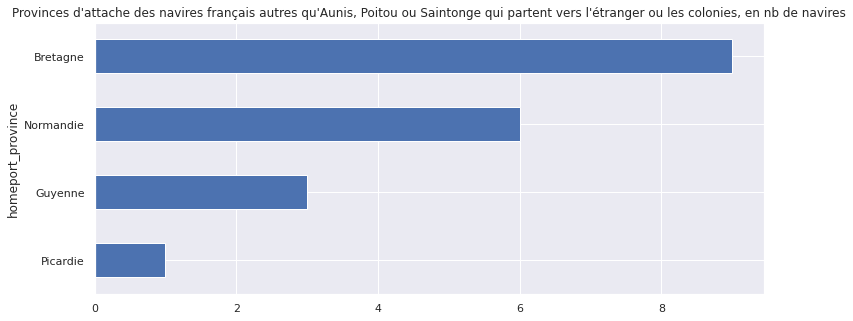

In [115]:
fr = noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province").size()
fr.sort_values().plot.barh()
plt.title("Provinces d'attache des navires français autres qu'Aunis, Poitou ou Saintonge qui partent vers l'étranger ou les colonies, en nb de navires")
plt.show()

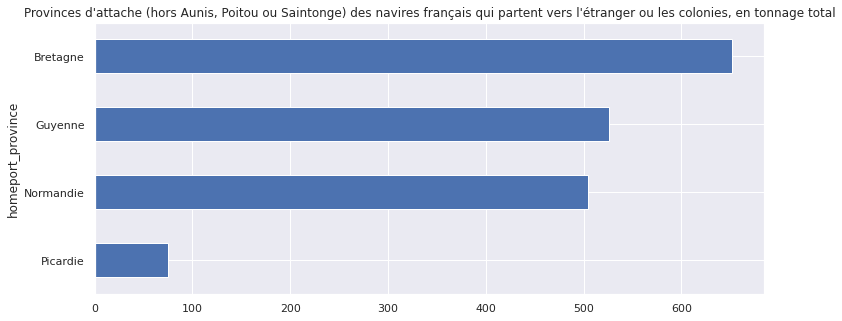

In [117]:
fr = noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province")["tonnage"].sum()
fr.sort_values().plot.barh()
plt.title("Provinces d'attache (hors Aunis, Poitou ou Saintonge) des navires français qui partent vers l'étranger ou les colonies, en tonnage total")
plt.show()

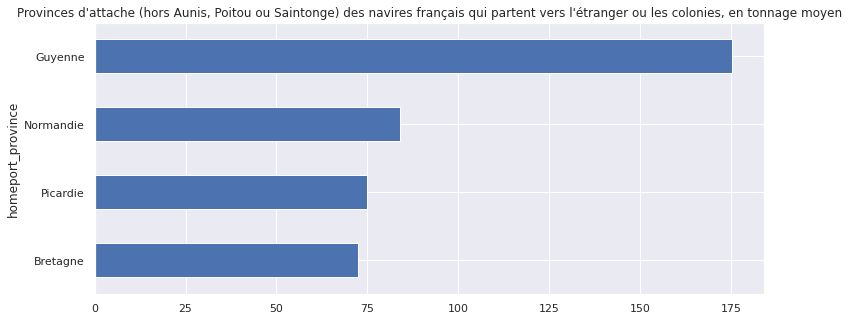

In [118]:
noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province")["tonnage"].mean().sort_values().plot.barh()
plt.title("Provinces d'attache (hors Aunis, Poitou ou Saintonge) des navires français qui partent vers l'étranger ou les colonies, en tonnage moyen")
plt.show()

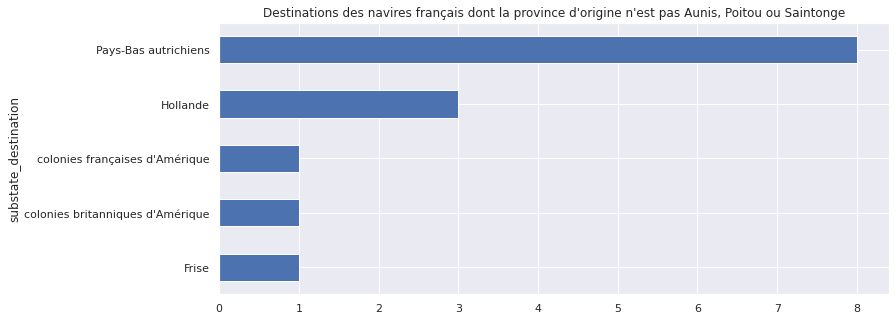

In [87]:
noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("substate_destination").size().sort_values().plot.barh()
plt.title("Destinations des navires français (hors Aunis, Poitou ou Saintonge) qui partent vers l'étranger ou les colonies, en nombre de n")
plt.show()